In [8]:
# ================================
# 📦 INSTALLATION (Run once)
# ================================
# Uncomment if running in a new environment like Colab or a fresh virtualenv
# !pip install pandas numpy nltk statsmodels

import nltk
nltk.download('vader_lexicon')  # Required for SentimentIntensityAnalyzer

# ================================
# 📚 IMPORTS
# ================================
import pandas as pd
import numpy as np
import csv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning

# ================================
# ⚠️ WARNINGS (Ignore Noise)
# ================================
warnings.filterwarnings("ignore", category=ValueWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Axl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# **Sentiment Identification** #

In [3]:
df = pd.read_csv('D:/coding_projects/pythonProjects/Data Mining/Final_Project/stock_tweets.csv') #to change PATH
df.tail()

,Date,Tweet,Stock Name,Company Name
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.
80792,2021-09-30 10:22:52+00:00,Why can XPeng P5 deliver outstanding performan...,XPEV,XPeng Inc.


In [4]:
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
# Perform sentiment analysis
df['scores'] = df['Tweet'].apply(lambda text: analyzer.polarity_scores(text))
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment'] = df['compound'].apply(lambda score: 'positive' if score >= 0.05 else 'negative' if score <= -0.05 else 'neutral')

In [6]:
# Split the 'Date' column into 'Date' and 'Timestamp' columns
df['Timestamp'] = df['Date'].apply(lambda x: x.split(' ')[1].split('+')[0])
df['Date'] = df['Date'].apply(lambda x: x.split(' ')[0])


In [7]:
df.rename(columns = {'Date':'date', 'Tweet':'tweet','Stock Name':'stock_name', 'Company Name':'company_name', 'Timestamp':'timestamp'}, inplace = True) 

In [8]:
# Reorder columns to place 'Timestamp' as the second column
df = df[['date', 'timestamp','tweet','stock_name','company_name','compound','sentiment']]

In [9]:
df.head()

,date,timestamp,tweet,stock_name,company_name,compound,sentiment
0,2022-09-29,23:41:16,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,positive
1,2022-09-29,23:24:43,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,neutral
2,2022-09-29,23:18:08,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960,positive
3,2022-09-29,22:40:07,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,negative
4,2022-09-29,22:27:05,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,negative


In [10]:
# df.to_csv('stock_tweets_updated.csv',index=False)

# **Data Merge** #

In [11]:
tweets_df = pd.read_csv('D:/coding_projects/pythonProjects/Data Mining/Final_Project/stock_tweets_updated.csv') #to change PATH
stocks_df = pd.read_csv('D:/coding_projects/pythonProjects/Data Mining/Final_Project/stock_yfinance_data.csv') #to change PATH
stocks_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [12]:
# Rename columns for consistency
stocks_df.rename(columns={'Date': 'date', 'Open': 'open', 'High':'high','Low':'low', 'Close':'close', 'Adj Close':'adj_close', 'Volume':'volume', 'Stock Name': 'stock_name'}, inplace=True)
stocks_df.head()

,date,open,high,low,close,adj_close,volume,stock_name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [13]:
# Merge the datasets on 'date' and 'stock_name'
merged_df = pd.merge(tweets_df, stocks_df, on=['date', 'stock_name'])
merged_df.head()

,date,timestamp,tweet,stock_name,company_name,compound,sentiment,open,high,low,close,adj_close,volume
0,2022-09-29,23:41:16,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,positive,282.76001,283.649994,265.779999,268.209991,268.209991,77620600
1,2022-09-29,23:24:43,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,neutral,282.76001,283.649994,265.779999,268.209991,268.209991,77620600
2,2022-09-29,23:18:08,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960,positive,282.76001,283.649994,265.779999,268.209991,268.209991,77620600
3,2022-09-29,22:40:07,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,negative,282.76001,283.649994,265.779999,268.209991,268.209991,77620600
4,2022-09-29,22:27:05,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,negative,282.76001,283.649994,265.779999,268.209991,268.209991,77620600


In [14]:
# Drop rows where 'stock_name' is 'TSM'
merged_df = merged_df[merged_df['stock_name'] != 'TSM']
stocks_df = stocks_df[stocks_df['stock_name'] != 'TSM']
tweets_df = tweets_df[tweets_df['stock_name'] != 'TSM']

In [15]:
tweets_df

,date,timestamp,tweet,stock_name,company_name,compound,sentiment
0,2022-09-29,23:41:16,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,positive
1,2022-09-29,23:24:43,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,neutral
2,2022-09-29,23:18:08,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960,positive
3,2022-09-29,22:40:07,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,negative
4,2022-09-29,22:27:05,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,negative
...,...,...,...,...,...,...,...
80788,2021-10-07,17:11:57,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,0.1779,positive
80789,2021-10-04,17:05:59,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,0.3818,positive
80790,2021-10-01,04:43:41,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,0.4215,positive
80791,2021-10-01,00:03:32,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,0.5423,positive


In [16]:
# merged_df.to_csv('merged_tweets_financial2.csv',index=False)

# **Feature Engineering** #

In [17]:
# Calculate average sentiment score per day per stock
merged_df['avg_sentiment_score'] = merged_df.groupby(['date', 'stock_name'])['compound'].transform('mean')

In [18]:
merged_df

,date,timestamp,tweet,stock_name,company_name,compound,sentiment,open,high,low,close,adj_close,volume,avg_sentiment_score
0,2022-09-29,23:41:16,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,positive,282.760010,283.649994,265.779999,268.209991,268.209991,77620600,0.062029
1,2022-09-29,23:24:43,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,neutral,282.760010,283.649994,265.779999,268.209991,268.209991,77620600,0.062029
2,2022-09-29,23:18:08,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960,positive,282.760010,283.649994,265.779999,268.209991,268.209991,77620600,0.062029
3,2022-09-29,22:40:07,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,negative,282.760010,283.649994,265.779999,268.209991,268.209991,77620600,0.062029
4,2022-09-29,22:27:05,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,negative,282.760010,283.649994,265.779999,268.209991,268.209991,77620600,0.062029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63671,2021-10-07,17:11:57,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,0.1779,positive,36.900002,38.880001,36.840000,38.259998,38.259998,12748700,0.177900
63672,2021-10-04,17:05:59,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,0.3818,positive,35.180000,35.200001,33.520000,34.110001,34.110001,6557200,0.381800
63673,2021-10-01,04:43:41,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,0.4215,positive,36.750000,36.759998,35.080002,35.459999,35.459999,7770600,0.481900
63674,2021-10-01,00:03:32,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,0.5423,positive,36.750000,36.759998,35.080002,35.459999,35.459999,7770600,0.481900


In [19]:
# Count positive, negative, and neutral tweets per day per stock
merged_df['positive_count'] = (merged_df['sentiment'] == 'positive').groupby([merged_df['date'], merged_df['stock_name']]).transform('sum')
merged_df['negative_count'] = (merged_df['sentiment'] == 'negative').groupby([merged_df['date'], merged_df['stock_name']]).transform('sum')
merged_df['neutral_count'] = (merged_df['sentiment'] == 'neutral').groupby([merged_df['date'], merged_df['stock_name']]).transform('sum')

In [20]:
# Create daily returns column for correlation analysis
merged_df['daily_returns'] = merged_df.groupby('stock_name')['close'].pct_change()

# Calculate rolling volatility for each stock and directly apply to the DataFrame
volatility_series = merged_df.groupby('stock_name')['daily_returns'].rolling(window=30).std().reset_index(level=0, drop=True)
merged_df['volatility'] = volatility_series * 100  # Converting to percentage terms for better interpretation

In [21]:
# Correcting the rolling operation to handle index compatibility issues
stocks_df['daily_returns'] = stocks_df.groupby('stock_name')['close'].pct_change()

# Calculate rolling volatility for each stock and directly apply to the DataFrame
volatility_series = stocks_df.groupby('stock_name')['daily_returns'].rolling(window=30).std().reset_index(level=0, drop=True)
stocks_df['volatility'] = volatility_series * 100  # Converting to percentage terms for better interpretation

# Display the updated DataFrame and its descriptive statistics
stocks_df.head(), stocks_df.describe()

(         date        open        high         low       close   adj_close  \
 0  2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
 1  2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
 2  2021-10-04  265.500000  268.989990  258.706665  260.510010  260.510010   
 3  2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   
 4  2021-10-06  258.733337  262.220001  257.739990  260.916656  260.916656   
 
      volume stock_name  daily_returns  volatility  
 0  53868000       TSLA            NaN         NaN  
 1  51094200       TSLA      -0.000335         NaN  
 2  91449900       TSLA       0.008140         NaN  
 3  55297800       TSLA      -0.001203         NaN  
 4  43898400       TSLA       0.002767         NaN  ,
               open         high          low        close    adj_close  \
 count  6048.000000  6048.000000  6048.000000  6048.000000  6048.000000   
 mean    177.757180   180.669732   174.675075   177.666998   

# **Exploratory Data Analysis** #

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

### ___Initial (Tweets Dataset)___ ###

 _Time Series_ 

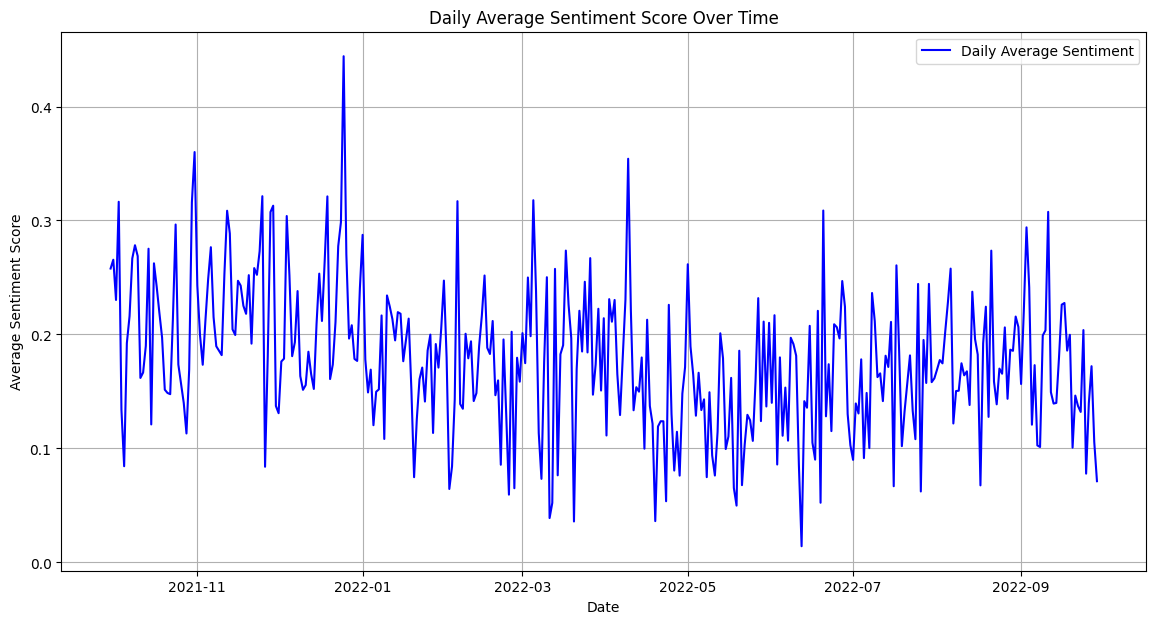

In [23]:
# Combine date and timestamp into a single datetime column
tweets_df['datetime'] = pd.to_datetime(tweets_df['date'] + ' ' + tweets_df['timestamp'])

# Set datetime as the index
tweets_df.set_index('datetime', inplace=True)

# Resample data by day and calculate the mean compound score
daily_sentiment = tweets_df['compound'].resample('D').mean()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(daily_sentiment, label='Daily Average Sentiment', color='blue')
plt.title('Daily Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.legend()
plt.show()

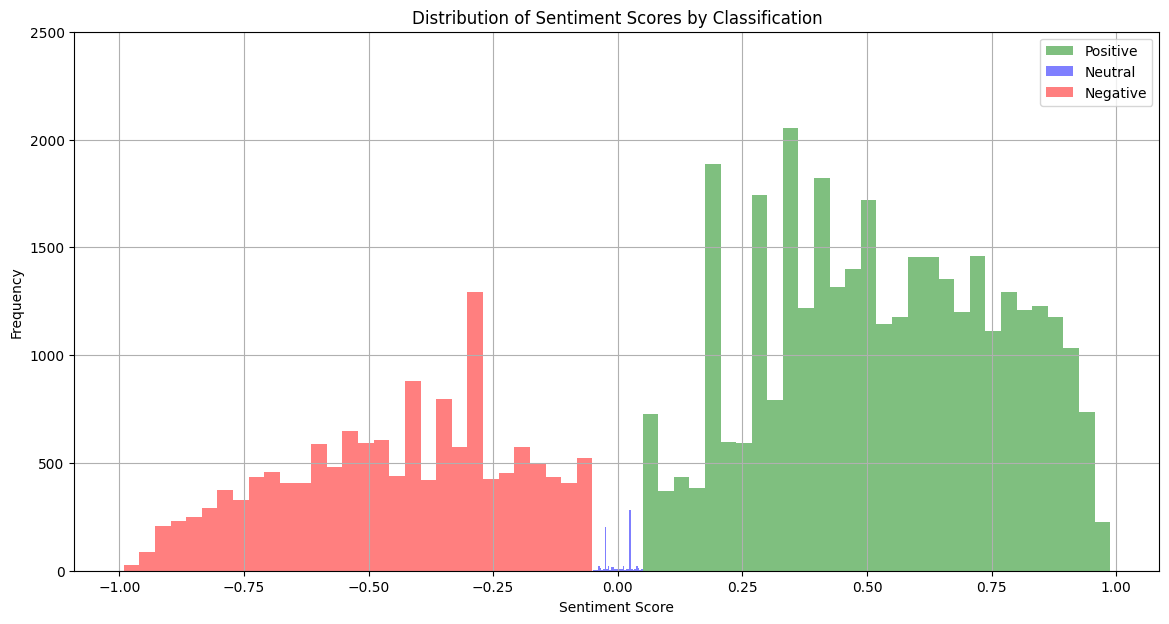

In [24]:
# Creating separate dataframes based on sentiment classification
positive_scores = tweets_df[tweets_df['sentiment'] == 'positive']['compound']
neutral_scores = tweets_df[tweets_df['sentiment'] == 'neutral']['compound']
negative_scores = tweets_df[tweets_df['sentiment'] == 'negative']['compound']

# Plotting histograms for each sentiment classification
plt.figure(figsize=(14, 7))
plt.hist(positive_scores, bins=30, alpha=0.5, label='Positive', color='green')
plt.hist(neutral_scores, bins=30, alpha=0.5, label='Neutral', color='blue')
plt.hist(negative_scores, bins=30, alpha=0.5, label='Negative', color='red')
plt.title('Distribution of Sentiment Scores by Classification')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.ylim(0, 2500)
plt.legend()
plt.grid(True)
plt.show()

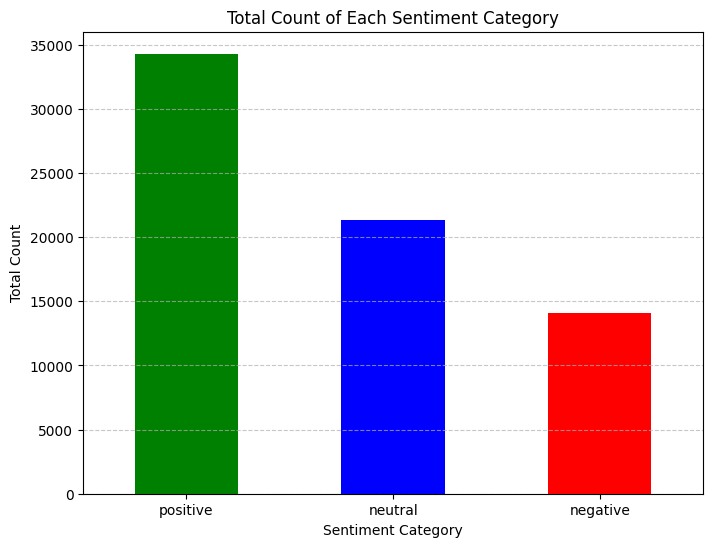

In [25]:
# Counting the total number of each sentiment category
sentiment_counts = tweets_df['sentiment'].value_counts()

# Plotting a histogram of sentiment counts
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Total Count of Each Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


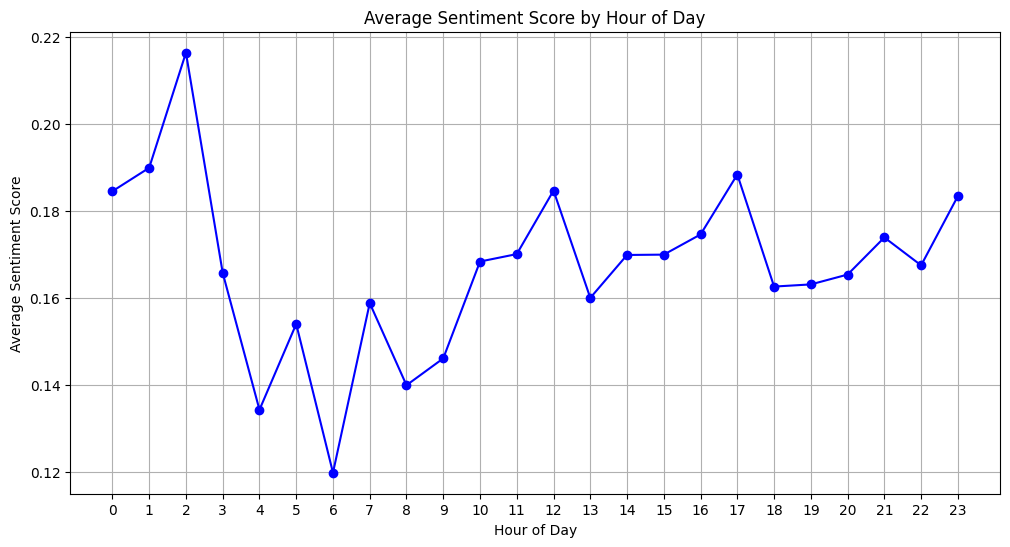

In [26]:
# Extract hour from the datetime index
tweets_df['hour'] = tweets_df.index.hour

# Group data by hour and calculate the average compound sentiment score
hourly_sentiment = tweets_df.groupby('hour')['compound'].mean().reset_index()

# Plotting average sentiment score by hour of the day
plt.figure(figsize=(12, 6))
plt.plot(hourly_sentiment['hour'], hourly_sentiment['compound'], marker='o', linestyle='-', color='blue')
plt.title('Average Sentiment Score by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(range(0, 24))  # Set x-ticks to show every hour
plt.show()

### __Initial (Financial Dataset)__ ###

In [27]:
stocks_df

,date,open,high,low,close,adj_close,volume,stock_name,daily_returns,volatility
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,NaN,NaN
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,-0.000335,NaN
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,0.008140,NaN
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,-0.001203,NaN
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,0.002767,NaN
...,...,...,...,...,...,...,...,...,...,...
6295,2022-09-23,13.090000,13.892000,12.860000,13.710000,13.710000,28279600,XPEV,-0.002183,3.824098
6296,2022-09-26,14.280000,14.830000,14.070000,14.370000,14.370000,27891300,XPEV,0.048140,4.010580
6297,2022-09-27,14.580000,14.800000,13.580000,13.710000,13.710000,21160800,XPEV,-0.045929,4.028946
6298,2022-09-28,13.050000,13.421000,12.690000,13.330000,13.330000,31799400,XPEV,-0.027717,4.031040


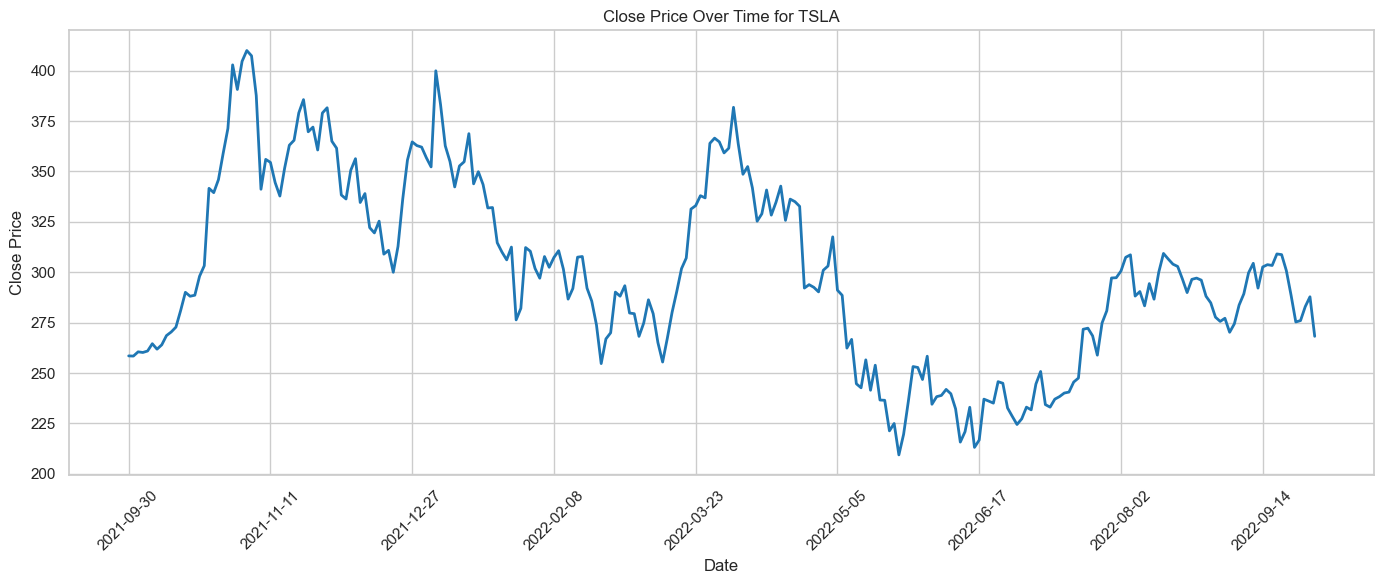

In [28]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 6))
tesla_data = stocks_df[stocks_df['stock_name'] == 'TSLA']
ax.plot(tesla_data['date'], tesla_data['close'], marker='', color='tab:blue', linewidth=2)
ax.set_title('Close Price Over Time for TSLA')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(tesla_data['date'][::30])
plt.tight_layout()
plt.savefig('stocks_timeseries_TSLA.png')
plt.show()

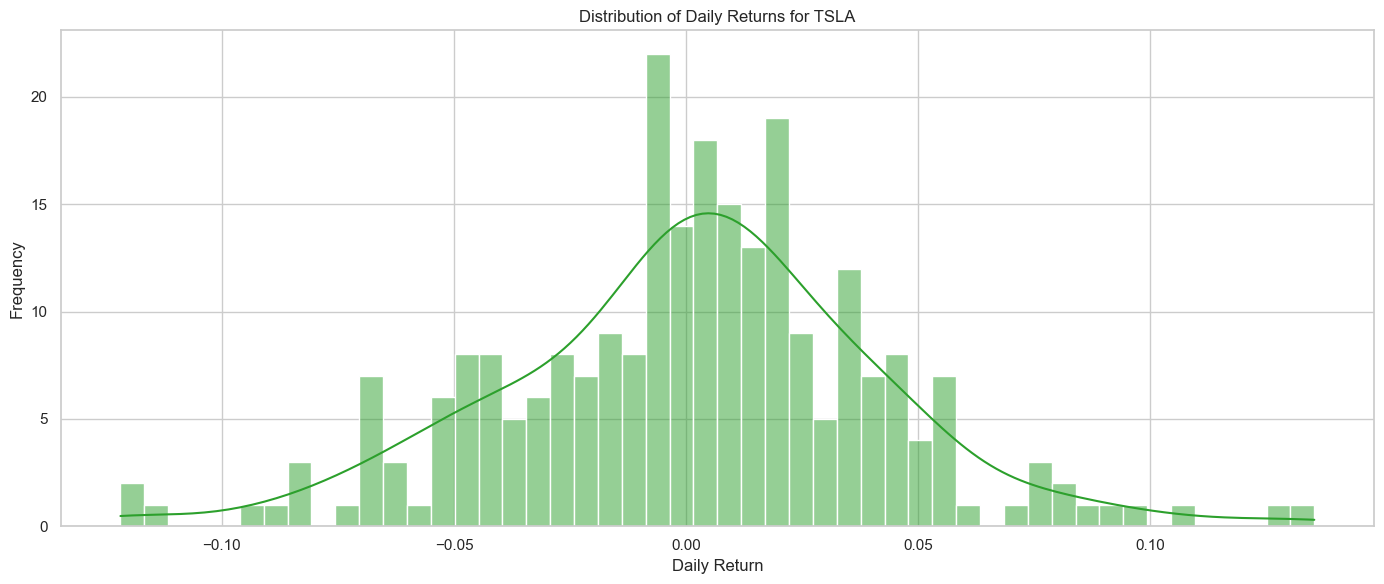

In [29]:
# Distribution of Daily Returns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(tesla_data['daily_returns'].dropna(), bins=50, kde=True, ax=ax, color='tab:green')
ax.set_title('Distribution of Daily Returns for TSLA')
ax.set_xlabel('Daily Return')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('stocks_distrib_returns_TSLA.png')
plt.show()

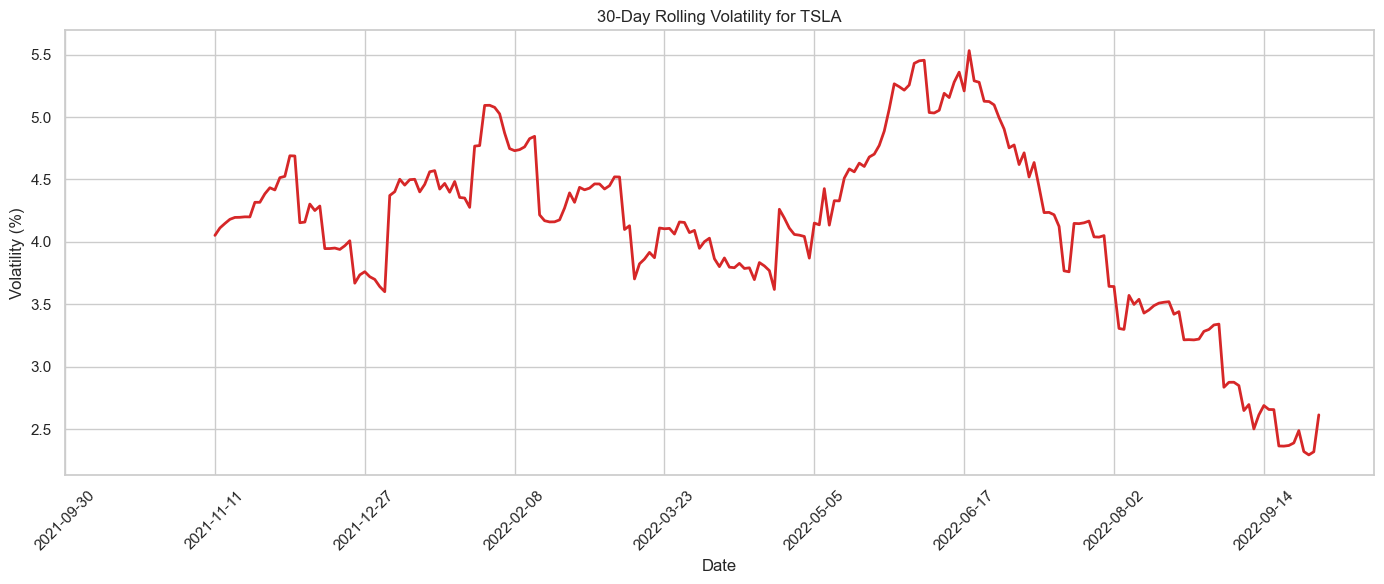

In [30]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(tesla_data['date'], tesla_data['volatility'], marker='', color='tab:red', linewidth=2)
ax.set_title('30-Day Rolling Volatility for TSLA')
ax.set_xlabel('Date')
ax.set_ylabel('Volatility (%)')
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(tesla_data['date'][::30])
plt.tight_layout()
plt.savefig('stocks_volatility_TSLA.png')
plt.show()

### ___Interesting___ ###

_Combined Dataset with the use of additional Feature Engeneering_

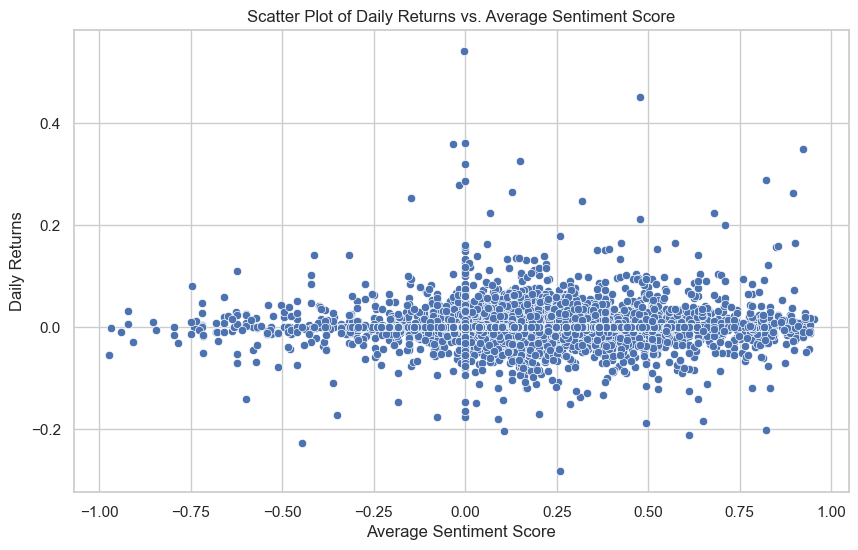

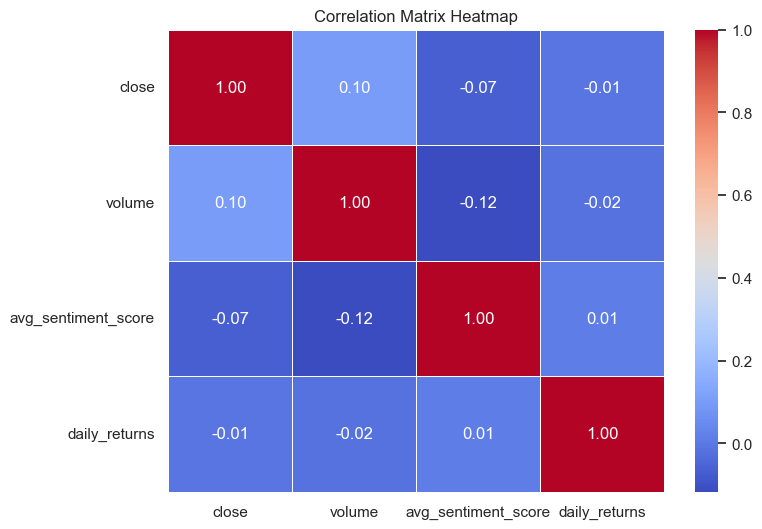

In [31]:
# Scatter plot to visualize relationships between daily sentiment scores and daily returns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_sentiment_score', y='daily_returns', data=merged_df)
plt.title('Scatter Plot of Daily Returns vs. Average Sentiment Score')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.savefig('returns_vs_sentiment.png')
plt.show()

# Correlation matrix
correlation_matrix = merged_df[['close', 'volume', 'avg_sentiment_score', 'daily_returns']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation.png')
plt.show()

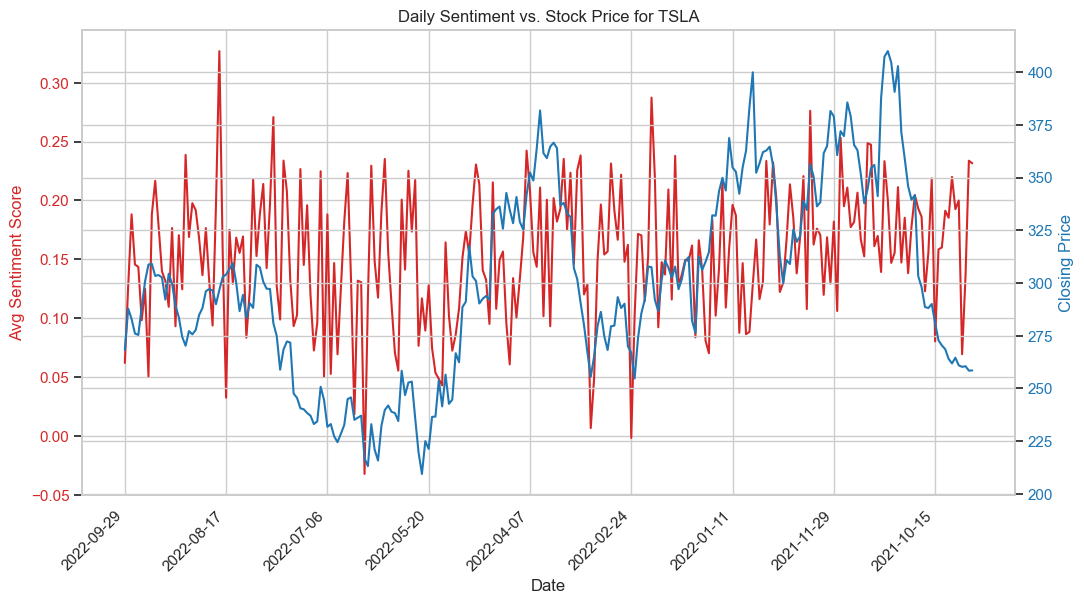

In [32]:
sample_stock = 'TSLA'
sample_data = merged_df[merged_df['stock_name'] == sample_stock]

fig, ax1 = plt.subplots(figsize=(11, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Sentiment Score', color=color)
ax1.plot(sample_data['date'], sample_data['avg_sentiment_score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Closing Price', color=color)  
ax2.plot(sample_data['date'], sample_data['close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Format the x-axis
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))  # Limit the number of x-ticks
fig.autofmt_xdate(rotation=45)  # Rotate to prevent overlap

fig.tight_layout()  
plt.title(f'Daily Sentiment vs. Stock Price for {sample_stock}')
plt.savefig('sentiment_vs_stock_TSLA_improved.png')
plt.show()

# __Data Mining Techniques__ #

__K-Means Clustering to remove irrelevant sentiments based on sentiment scores/compound__
> Too negative or too positive compound values can be considered as irrelevant 


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

#### _Grouped by Date and Stock Name_ ####

In [34]:
grouped_data = merged_df.groupby(['stock_name', 'date'])

In [35]:
def find_outliers(group):
    # Reshape sentiment scores for scaling
    sentiment_scores = group['compound'].values.reshape(-1, 1)
    
    # Check if there are enough samples to perform clustering
    if len(sentiment_scores) < 3:  # Adjust this number based on your minimum cluster number
        # Not enough samples to cluster; could return the entire group as outliers
        # or simply return an empty DataFrame depending on your analysis needs
        return pd.DataFrame()  # Or return group to consider all as outliers

    # Normalize sentiment scores
    scaler = StandardScaler()
    normalized_scores = scaler.fit_transform(sentiment_scores)
    
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)  # Sets the 3 clusters for the sentiment classification
    clusters = kmeans.fit_predict(normalized_scores)
    centroids = kmeans.cluster_centers_
    
    # Calculate distances from centroids
    distances = np.linalg.norm(normalized_scores - centroids[clusters], axis=1)
    
    # Define outliers (e.g., distances in the top 5% of each group)
    distance_threshold = np.percentile(distances, 99)
    outliers = group[distances > distance_threshold]
    
    return outliers


In [36]:
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    outliers_grouped = grouped_data.apply(find_outliers, include_groups=False)
    
# outliers_grouped = grouped_data.apply(find_outliers)

In [37]:
outliers_grouped

timestamp  \
stock_name date                         
AAPL       2021-09-30 49341  15:30:03   
           2021-10-01 49337  00:15:01   
           2021-10-04 49324  02:21:29   
           2021-10-05 49314  16:35:06   
           2021-10-06 49310  13:55:04   
...                               ...   
TSLA       2022-09-29 45     16:44:48   
                      77     12:00:53   
XPEV       2021-11-23 63630  10:16:03   
           2022-01-04 63587  05:25:36   
ZS         2021-11-29 63482  17:20:00   

                                                                         tweet  \
stock_name date                                                                  
AAPL       2021-09-30 49341  This thread is just a broad overview of the ba...   
           2021-10-01 49337  Trade plan for Friday ✅\n\nIf $SPX fails at 43...   
           2021-10-04 49324  Having trouble deciding which stock to invest ...   
           2021-10-05 49314  $AAPL daily falling wedge📈 https://t.co/cJW9MH...   
           2021-10-06 49310  Returns, Last 10 Years..\nBitcoin $BTC: +1,150...   
...                                                                        ...   
TSLA       2022-09-29 45     @klwtts @Tesla @elonmusk Hey @elonmusk, Tesla ...   
                      77     Happy Thursday. The hurricane passed over my h...   
XPEV       2021-11-23 63630  “We continued record-setting growth in the 3Q ...   
           2022-01-04 63587  Our Vice Chairman &amp; President Brian Gu sha...   
ZS         2021-11-29 63482  The last batch of #SaaS companies are set to r...   

                              company_name  compound sentiment        open  \
stock_name date                                                              
AAPL       2021-09-30 49341     Apple Inc.    0.4767  positive  143.660004   
           2021-10-01 49337     Apple Inc.   -0.4215  negative  141.899994   
           2021-10-04 49324     Apple Inc.    0.4215  positive  141.759995   
           2021-10-05 49314     Apple Inc.   -0.1531  negative  139.490005   
           2021-10-06 49310     Apple Inc.    0.1779  positive  139.470001   
...                                    ...       ...       ...         ...   
TSLA       2022-09-29 45       Tesla, Inc.    0.9169  positive  282.760010   
                      77       Tesla, Inc.    0.9723  positive  282.760010   
XPEV       2021-11-23 63630     XPeng Inc.    0.3818  positive   49.000000   
           2022-01-04 63587     XPeng Inc.    0.3612  positive   49.779999   
ZS         2021-11-29 63482  Zscaler, Inc.    0.3506  positive  342.269989   

                                   high         low       close   adj_close  \
stock_name date                                                               
AAPL       2021-09-30 49341  144.380005  141.279999  141.500000  140.478485   
           2021-10-01 49337  142.919998  139.110001  142.649994  141.620163   
           2021-10-04 49324  142.210007  138.270004  139.139999  138.135513   
           2021-10-05 49314  142.240005  139.360001  141.110001  140.091278   
           2021-10-06 49310  142.149994  138.369995  142.000000  140.974869   
...                                 ...         ...         ...         ...   
TSLA       2022-09-29 45     283.649994  265.779999  268.209991  268.209991   
                      77     283.649994  265.779999  268.209991  268.209991   
XPEV       2021-11-23 63630   54.000000   47.500000   51.299999   51.299999   
           2022-01-04 63587   49.950001   46.070000   47.599998   47.599998   
ZS         2021-11-29 63482  358.359985  342.269989  355.920013  355.920013   

                                 volume  avg_sentiment_score  positive_count  \
stock_name date                                                                
AAPL       2021-09-30 49341  89056700.0             0.098900             4.0   
           2021-10-01 49337  94639600.0             0.291891             7.0   
           2021-10-04 49324  98322000.0             0.047410    

In [38]:
# Optionally, save the outliers to a new CSV file
# outliers_grouped.to_csv('outlier_grouped_final.csv', index=False)

#### _Clustered using Dataset_ ####

In [39]:
# Assume 'compound' column contains the sentiment scores
sentiment_scores = merged_df['compound'].values.reshape(-1, 1)  # Reshape for scaling

In [40]:
scaler = StandardScaler()
normalized_scores = scaler.fit_transform(sentiment_scores)


In [41]:
scaler = StandardScaler()
normalized_scores = scaler.fit_transform(sentiment_scores)


In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust clusters as needed
clusters = kmeans.fit_predict(normalized_scores)


In [43]:
centroids = kmeans.cluster_centers_
distances = np.linalg.norm(normalized_scores - centroids[clusters], axis=1)


In [44]:
distance_threshold = np.percentile(distances, 99)
outliers = merged_df[distances > distance_threshold]
outliers

,date,timestamp,tweet,stock_name,company_name,compound,sentiment,open,high,low,close,adj_close,volume,avg_sentiment_score,positive_count,negative_count,neutral_count,daily_returns,volatility
4,2022-09-29,22:27:05,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,negative,282.760010,283.649994,265.779999,268.209991,268.209991,77620600,0.062029,49,37,26,0.000000,NaN
6,2022-09-29,22:24:22,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",-0.9359,negative,282.760010,283.649994,265.779999,268.209991,268.209991,77620600,0.062029,49,37,26,0.000000,NaN
77,2022-09-29,12:00:53,Happy Thursday. The hurricane passed over my h...,TSLA,"Tesla, Inc.",0.9723,positive,282.760010,283.649994,265.779999,268.209991,268.209991,77620600,0.062029,49,37,26,0.000000,0.000000
84,2022-09-29,07:17:13,Market Recap:\nhttps://t.co/9UcUqreEvu\nWhy di...,TSLA,"Tesla, Inc.",-0.9079,negative,282.760010,283.649994,265.779999,268.209991,268.209991,77620600,0.062029,49,37,26,0.000000,0.000000
121,2022-09-28,20:47:35,I know nothing about the Airbnb co-founder exc...,TSLA,"Tesla, Inc.",-0.9001,negative,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,0.127383,38,20,17,0.000000,1.334199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62553,2022-01-03,22:37:26,$NIO #update \nI did not add today due to big...,NIO,NIO Inc.,0.9635,positive,33.520000,33.799999,31.879999,33.470001,33.470001,64286500,0.279829,10,1,10,0.059848,1.505817
62659,2021-12-27,01:45:15,The #1 reason I started creating daily content...,NIO,NIO Inc.,0.9753,positive,30.389999,31.320000,29.809999,29.959999,29.959999,36081100,0.228608,7,1,5,0.000000,0.907891
62762,2021-12-15,12:32:50,Whats sad is $RIVN $LCID get these ridiculous ...,NIO,NIO Inc.,-0.8753,negative,31.500000,31.840000,29.059999,30.790001,30.790001,80802100,-0.007941,5,5,7,0.000000,0.437765
63130,2021-11-03,14:49:55,$nio I lived in Shanghai for 3 years before th...,NIO,NIO Inc.,0.9666,positive,41.980000,42.410000,40.630001,41.500000,41.500000,34202100,0.436210,6,1,3,0.000000,0.784754


In [45]:
# outliers.to_csv('outlier_final.csv', index=False)

### _FORECASTING_ ###
> Use __SARIMAX__ to forecast

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
merged_df = pd.read_csv('D:/coding_projects/pythonProjects/Data Mining/Final_Project/merged_tweets_financial2.csv') #to change PATH


In [48]:
# Make sure 'date' column is datetime type and set as index
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df.set_index('date', inplace=True)

In [49]:
merged_df

,timestamp,tweet,stock_name,company_name,compound,sentiment,open,high,low,close,adj_close,volume
date,,,,,,,,,,,,
2022-09-29,23:41:16,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,positive,282.760010,283.649994,265.779999,268.209991,268.209991,77620600
2022-09-29,23:24:43,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,neutral,282.760010,283.649994,265.779999,268.209991,268.209991,77620600
2022-09-29,23:18:08,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960,positive,282.760010,283.649994,265.779999,268.209991,268.209991,77620600
2022-09-29,22:40:07,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,negative,282.760010,283.649994,265.779999,268.209991,268.209991,77620600
2022-09-29,22:27:05,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,negative,282.760010,283.649994,265.779999,268.209991,268.209991,77620600
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-07,17:11:57,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,0.1779,positive,36.900002,38.880001,36.840000,38.259998,38.259998,12748700
2021-10-04,17:05:59,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,0.3818,positive,35.180000,35.200001,33.520000,34.110001,34.110001,6557200
2021-10-01,04:43:41,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,0.4215,positive,36.750000,36.759998,35.080002,35.459999,35.459999,7770600


### _FORECASTING w/o Influence of Sentiments_ ###

In [50]:
# Aggregate data to get mean of close prices and first open price of the day
merged_df1 = merged_df.groupby(['date', 'stock_name']).agg({
    'open': 'first', # First opening price
    'close': 'mean',  # Mean of closing prices
}).reset_index()

In [51]:
# Ensure data is sorted by date
merged_df1.sort_values(by=['stock_name', 'date'], inplace=True)

In [52]:
merged_df1

,date,stock_name,open,close
0,2021-09-30,AAPL,143.660004,141.500000
12,2021-10-01,AAPL,141.899994,142.649994
26,2021-10-04,AAPL,141.759995,139.139999
41,2021-10-05,AAPL,139.490005,141.110001
55,2021-10-06,AAPL,139.470001,142.000000
...,...,...,...,...
3754,2022-09-14,ZS,182.149994,182.979996
3836,2022-09-21,ZS,173.020004,171.880005
3897,2022-09-27,ZS,163.910004,163.210007
3915,2022-09-28,ZS,164.000000,168.779999


In [53]:
# Prepare a new DataFrame for forecasted results
forecasted_close_without_sentiment = pd.DataFrame()

In [54]:
merged_df1

,date,stock_name,open,close
0,2021-09-30,AAPL,143.660004,141.500000
12,2021-10-01,AAPL,141.899994,142.649994
26,2021-10-04,AAPL,141.759995,139.139999
41,2021-10-05,AAPL,139.490005,141.110001
55,2021-10-06,AAPL,139.470001,142.000000
...,...,...,...,...
3754,2022-09-14,ZS,182.149994,182.979996
3836,2022-09-21,ZS,173.020004,171.880005
3897,2022-09-27,ZS,163.910004,163.210007
3915,2022-09-28,ZS,164.000000,168.779999


In [55]:
# Loop through each stock
for stock in merged_df1['stock_name'].unique():
    stock_data = merged_df1[merged_df1['stock_name'] == stock]
    stock_data.set_index('date', inplace=True)

    # Fit the SARIMAX model using the open price of the same day as an exogenous variable
    model = SARIMAX(stock_data['close'], exog=stock_data['open'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    results = model.fit()

    # In-sample predictions using the open price of the same day as an exogenous variable
    stock_data['forecasted_close'] = results.predict(start=stock_data.index[0], end=stock_data.index[-1], exog=stock_data['open'])

    # Calculate the error between forecasted and actual close
    stock_data['error'] = stock_data['close'] - stock_data['forecasted_close']

    # Append results
    forecasted_close_without_sentiment = pd.concat([forecasted_close_without_sentiment, stock_data.reset_index()])

# Reset index to include date and stock name in the forecasted results DataFrame
forecasted_close_without_sentiment.set_index(['date', 'stock_name'], inplace=True)

In [56]:
# Reset the index so that 'date' and 'stock_name' become regular columns
forecasted_close_without_sentiment_reset = forecasted_close_without_sentiment.reset_index()

In [57]:
# forecasted_close_without_sentiment_reset.to_csv('forecasted5.csv', index=False)

In [58]:
forecasted_close_without_sentiment_reset

,date,stock_name,open,close,forecasted_close,error
0,2021-09-30,AAPL,143.660004,141.500000,139.149180,2.350820
1,2021-10-01,AAPL,141.899994,142.649994,139.795236,2.854758
2,2021-10-04,AAPL,141.759995,139.139999,141.074682,-1.934683
3,2021-10-05,AAPL,139.490005,141.110001,138.256510,2.853490
4,2021-10-06,AAPL,139.470001,142.000000,138.917579,3.082421
...,...,...,...,...,...,...
3927,2022-09-14,ZS,182.149994,182.979996,182.481630,0.498366
3928,2022-09-21,ZS,173.020004,171.880005,173.230473,-1.350468
3929,2022-09-27,ZS,163.910004,163.210007,164.663883,-1.453876
3930,2022-09-28,ZS,164.000000,168.779999,164.555166,4.224833


### _FORECASTING w/ Influence of Sentiments_ ###

In [59]:
# Aggregate data to get mean of close prices, first open price of the day, and mean compound sentiment scores
merged_df2 = merged_df.groupby(['date', 'stock_name']).agg({
    'close': 'mean',  # Mean of closing prices
    'open': 'first',  # First opening price
    'compound': 'mean'  # Mean of compound sentiment scores
}).reset_index()

In [60]:
# Ensure data is sorted by stock name and date
merged_df2.sort_values(by=['stock_name', 'date'], inplace=True)

# Prepare a new DataFrame for forecasted results
forecasted_close_with_sentiment = pd.DataFrame()

In [61]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
# Suppress ConvergenceWarnings specifically from statsmodels
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Suppress specific UserWarning regarding starting MA parameters
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found. Using zeros as starting parameters.")

# Loop through each stock
for stock in merged_df2['stock_name'].unique():
    stock_data = merged_df2[merged_df2['stock_name'] == stock]
    stock_data.set_index('date', inplace=True)

    # Prepare exogenous variables (open prices and compound sentiment scores)
    exog = stock_data[['open', 'compound']]

    # Fit the SARIMAX model using the open price and compound sentiment scores as exogenous variables
    model = SARIMAX(stock_data['close'], exog=exog, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    results = model.fit()

    # In-sample predictions using the open price and compound sentiment scores as exogenous variables
    stock_data['forecasted_close'] = results.predict(start=stock_data.index[0], end=stock_data.index[-1], exog=exog)

    # Calculate the error between forecasted and actual close
    stock_data['error'] = stock_data['close'] - stock_data['forecasted_close']

    # Append results
    forecasted_close_with_sentiment = pd.concat([forecasted_close_with_sentiment, stock_data.reset_index()])

# Reset index to include date and stock name in the forecasted results DataFrame
forecasted_close_with_sentiment.set_index(['date', 'stock_name'], inplace=True)

In [62]:
# Reset the index so that 'date' and 'stock_name' become regular columns
forecasted_close_with_sentiment_reset = forecasted_close_with_sentiment.reset_index()

In [63]:
# Save the DataFrame to a CSV file
# forecasted_close_with_sentiment_reset.to_csv('forecasted_stock_prices_with_sentiment.csv', index=False)

In [64]:
forecasted_close_with_sentiment_reset

,date,stock_name,close,open,compound,forecasted_close,error
0,2021-09-30,AAPL,141.500000,143.660004,0.098900,139.127825,2.372175
1,2021-10-01,AAPL,142.649994,141.899994,0.291891,140.030899,2.619095
2,2021-10-04,AAPL,139.139999,141.759995,0.047410,140.891512,-1.751512
3,2021-10-05,AAPL,141.110001,139.490005,0.139060,138.257460,2.852541
4,2021-10-06,AAPL,142.000000,139.470001,0.190330,138.965002,3.034998
...,...,...,...,...,...,...,...
3927,2022-09-14,ZS,182.979996,182.149994,0.000000,182.495756,0.484240
3928,2022-09-21,ZS,171.880005,173.020004,0.512200,173.887885,-2.007880
3929,2022-09-27,ZS,163.210007,163.910004,-0.153100,164.156285,-0.946278
3930,2022-09-28,ZS,168.779999,164.000000,0.381800,164.988761,3.791238


### _FORECASTING Comparison of MAE and RMSE

In [65]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error


In [66]:
results_without = pd.read_csv('D:/coding_projects/pythonProjects/Data Mining/Final_Project/forecasted5.csv')  #to change PATH
results_with = pd.read_csv('D:/coding_projects/pythonProjects/Data Mining/Final_Project/forecasted_stock_prices_with_sentiment.csv') #to change PATH

In [67]:
# Function to calculate RMSE and MAE
def evaluate_forecasts(actuals, predictions):
    mae = mean_absolute_error(actuals, predictions)
    rmse = root_mean_squared_error(actuals, predictions)
    return mae, rmse

In [68]:
# results_without and results_with as the two datasets with predictions
actuals_1 = results_without['close']
predictions_1 = results_without['forecasted_close']

actuals_2 = results_with['close']
predictions_2 = results_with['forecasted_close']

# Evaluate each model
mae1, rmse1 = evaluate_forecasts(actuals_1, predictions_1)
mae2, rmse2 = evaluate_forecasts(actuals_2, predictions_2)

In [69]:
print("Forecasting Model - MAE: {:.4f}, RMSE: {:.4f}".format(mae1, rmse1))
print("Forecasting Model w/ Sentiment Scores - MAE: {:.4f}, RMSE: {:.4f}".format(mae2, rmse2))

if mae1 < mae2:
    print("Forecasting Model performs better based on MAE.")
else:
    print("Forecasting Model w/ Sentiment Scores performs better based on MAE.")

# Compare the models
if rmse1 < rmse2:
    print("Forecasting Model performs better based on RMSE.")
else:
    print("Forecasting Model w/ Sentiment Scores performs better based on RMSE.")

Forecasting Model - MAE: 3.3544, RMSE: 5.4153
Forecasting Model w/ Sentiment Scores - MAE: 3.3432, RMSE: 5.3766
Forecasting Model w/ Sentiment Scores performs better based on MAE.
Forecasting Model w/ Sentiment Scores performs better based on RMSE.


### _FORECASTING Chart Comparisons

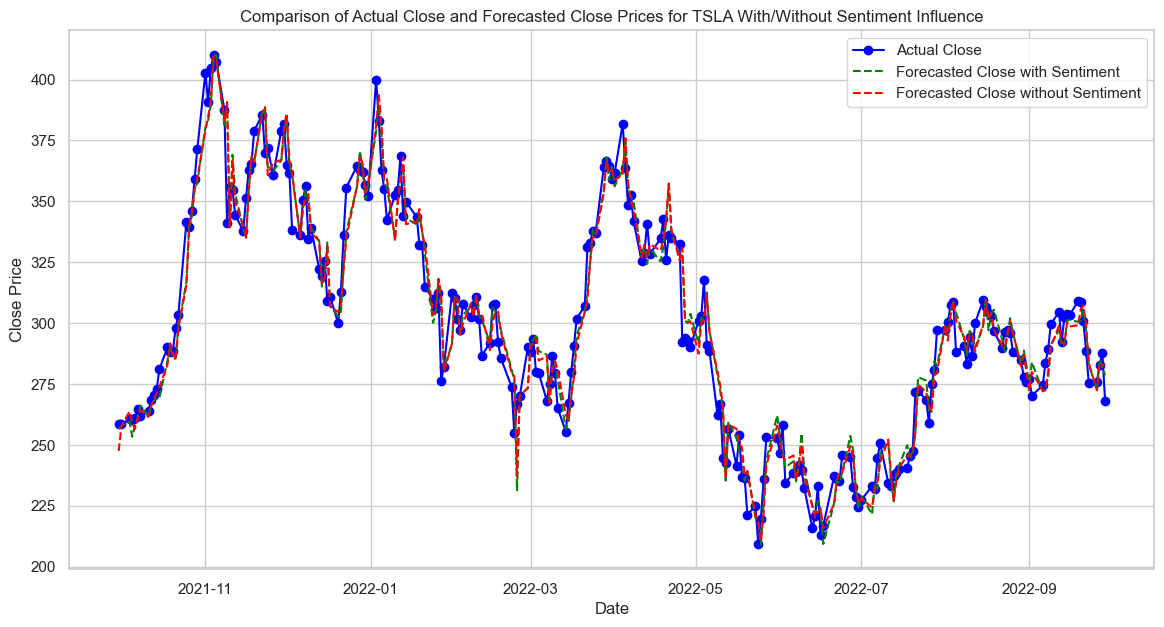

In [72]:
import matplotlib.pyplot as plt

# Resetting indexes to use them in plots if not already reset (depends on your last line of code handling the DataFrames)
forecasted_close_with_sentiment_reset = forecasted_close_with_sentiment.reset_index()
forecasted_close_without_sentiment_reset = forecasted_close_without_sentiment.reset_index()

# Selecting a single stock for clarity in visualization, you can iterate this part for each stock or modify as needed
stock = 'TSLA'  # Replace with the actual stock name you want to plot

# Filtering data for the selected stock
data_with = forecasted_close_with_sentiment_reset[forecasted_close_with_sentiment_reset['stock_name'] == stock]
data_without = forecasted_close_without_sentiment_reset[forecasted_close_without_sentiment_reset['stock_name'] == stock]

plt.figure(figsize=(14, 7))

# Plotting the actual close prices
plt.plot(data_with['date'], data_with['close'], label='Actual Close', color='blue', marker='o')

# Plotting the forecasted close prices with sentiment influence
plt.plot(data_with['date'], data_with['forecasted_close'], label='Forecasted Close with Sentiment', color='green', linestyle='--')

# Plotting the forecasted close prices without sentiment influence
plt.plot(data_without['date'], data_without['forecasted_close'], label='Forecasted Close without Sentiment', color='red', linestyle='--')

plt.title(f'Comparison of Actual Close and Forecasted Close Prices for {stock} With/Without Sentiment Influence')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


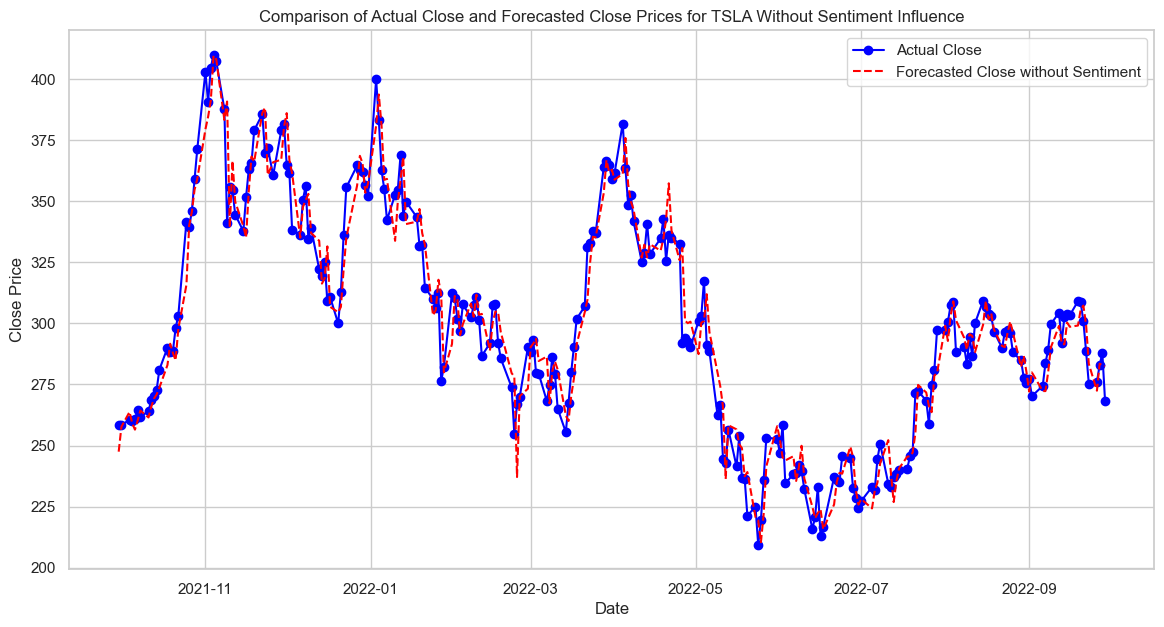

In [73]:
import matplotlib.pyplot as plt

# Resetting indexes to use them in plots if not already reset (depends on your last line of code handling the DataFrames)
forecasted_close_with_sentiment_reset = forecasted_close_with_sentiment.reset_index()
forecasted_close_without_sentiment_reset = forecasted_close_without_sentiment.reset_index()

# Selecting a single stock for clarity in visualization, you can iterate this part for each stock or modify as needed
stock = 'TSLA'  # Replace with the actual stock name you want to plot

# Filtering data for the selected stock
data_with = forecasted_close_with_sentiment_reset[forecasted_close_with_sentiment_reset['stock_name'] == stock]
data_without = forecasted_close_without_sentiment_reset[forecasted_close_without_sentiment_reset['stock_name'] == stock]

plt.figure(figsize=(14, 7))

# Plotting the actual close prices
plt.plot(data_with['date'], data_with['close'], label='Actual Close', color='blue', marker='o')

# Plotting the forecasted close prices without sentiment influence
plt.plot(data_without['date'], data_without['forecasted_close'], label='Forecasted Close without Sentiment', color='red', linestyle='--')

plt.title(f'Comparison of Actual Close and Forecasted Close Prices for {stock} Without Sentiment Influence')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


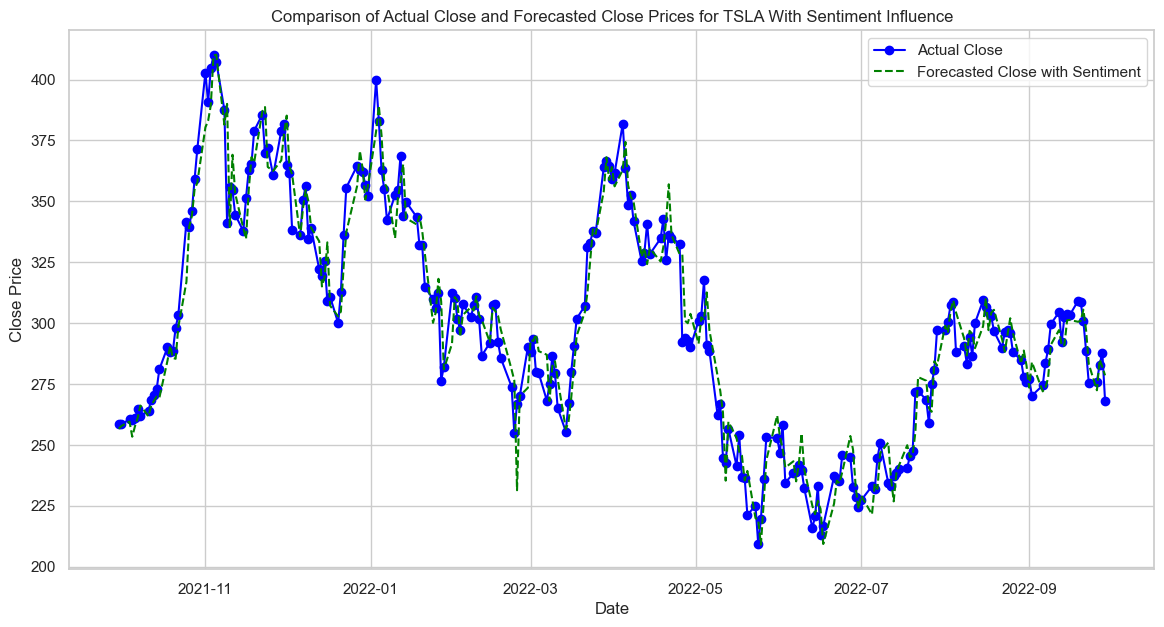

In [74]:
import matplotlib.pyplot as plt

# Resetting indexes to use them in plots if not already reset (depends on your last line of code handling the DataFrames)
forecasted_close_with_sentiment_reset = forecasted_close_with_sentiment.reset_index()
forecasted_close_without_sentiment_reset = forecasted_close_without_sentiment.reset_index()

# Selecting a single stock for clarity in visualization, you can iterate this part for each stock or modify as needed
stock = 'TSLA'  # Replace with the actual stock name you want to plot

# Filtering data for the selected stock
data_with = forecasted_close_with_sentiment_reset[forecasted_close_with_sentiment_reset['stock_name'] == stock]
data_without = forecasted_close_without_sentiment_reset[forecasted_close_without_sentiment_reset['stock_name'] == stock]

plt.figure(figsize=(14, 7))

# Plotting the actual close prices
plt.plot(data_with['date'], data_with['close'], label='Actual Close', color='blue', marker='o')

# Plotting the forecasted close prices with sentiment influence
plt.plot(data_with['date'], data_with['forecasted_close'], label='Forecasted Close with Sentiment', color='green', linestyle='--')

plt.title(f'Comparison of Actual Close and Forecasted Close Prices for {stock} With Sentiment Influence')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


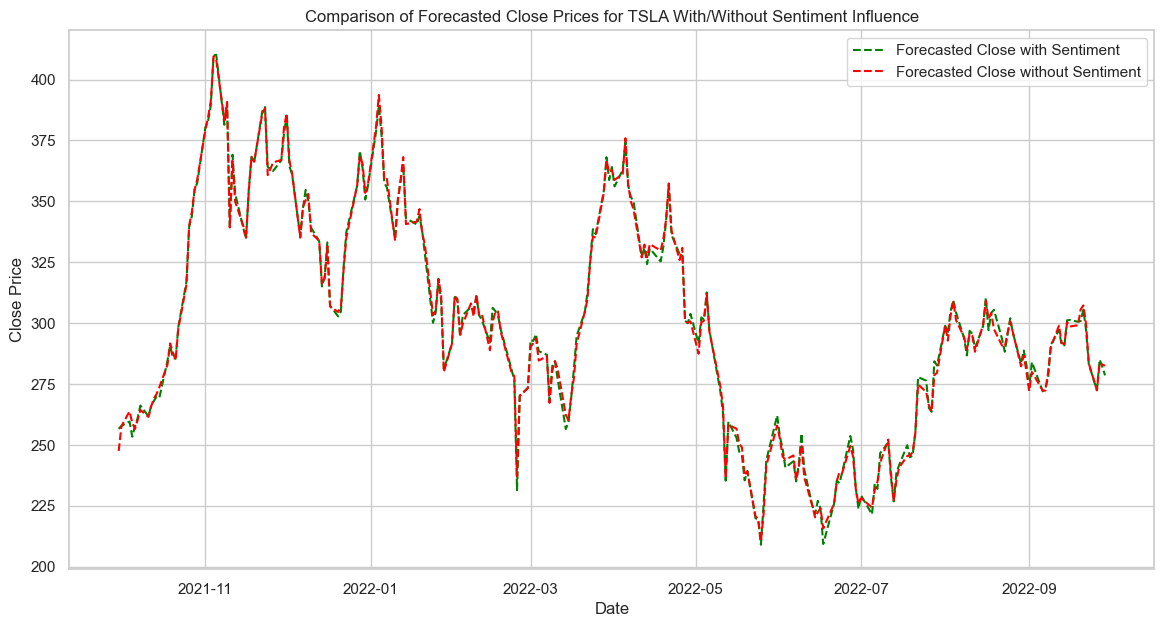

In [75]:
import matplotlib.pyplot as plt

# Resetting indexes to use them in plots if not already reset (depends on your last line of code handling the DataFrames)
forecasted_close_with_sentiment_reset = forecasted_close_with_sentiment.reset_index()
forecasted_close_without_sentiment_reset = forecasted_close_without_sentiment.reset_index()

# Selecting a single stock for clarity in visualization, you can iterate this part for each stock or modify as needed
stock = 'TSLA'  # Replace with the actual stock name you want to plot

# Filtering data for the selected stock
data_with = forecasted_close_with_sentiment_reset[forecasted_close_with_sentiment_reset['stock_name'] == stock]
data_without = forecasted_close_without_sentiment_reset[forecasted_close_without_sentiment_reset['stock_name'] == stock]

plt.figure(figsize=(14, 7))

# Plotting the forecasted close prices with sentiment influence
plt.plot(data_with['date'], data_with['forecasted_close'], label='Forecasted Close with Sentiment', color='green', linestyle='--')

# Plotting the forecasted close prices without sentiment influence
plt.plot(data_without['date'], data_without['forecasted_close'], label='Forecasted Close without Sentiment', color='red', linestyle='--')

plt.title(f'Comparison of Forecasted Close Prices for {stock} With/Without Sentiment Influence')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
